In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 175

# LOG STEP

Text(0.5, 0, 'Lorentz factor')

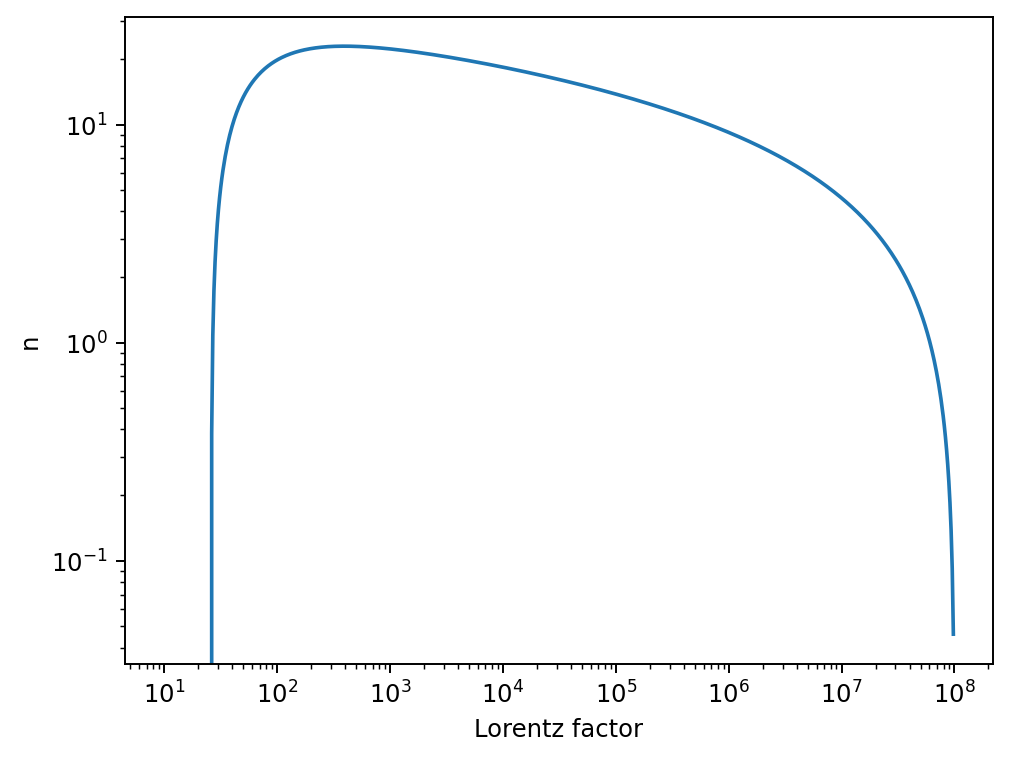

In [151]:
sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\log_step_simulation_data.csv",
header=None,
low_memory=False,
)
sim_data=sim_data.T
sim_data.columns = sim_data.iloc[0]
sim_data = sim_data[1:]
sim_data.reset_index(drop=True, inplace=True)
plt.plot(sim_data["gamma"], sim_data.iloc[:,-1])
plt.ylabel("n")
plt.yscale("log")
plt.xscale("log")
#plt.ylim(1e-28)
#plt.xlim(1e1, 1e5)
plt.xlabel("Lorentz factor")

B = 0.1
B = 0.25
B = 0.5
B = 1.0
B = 1.5
B = 2.0


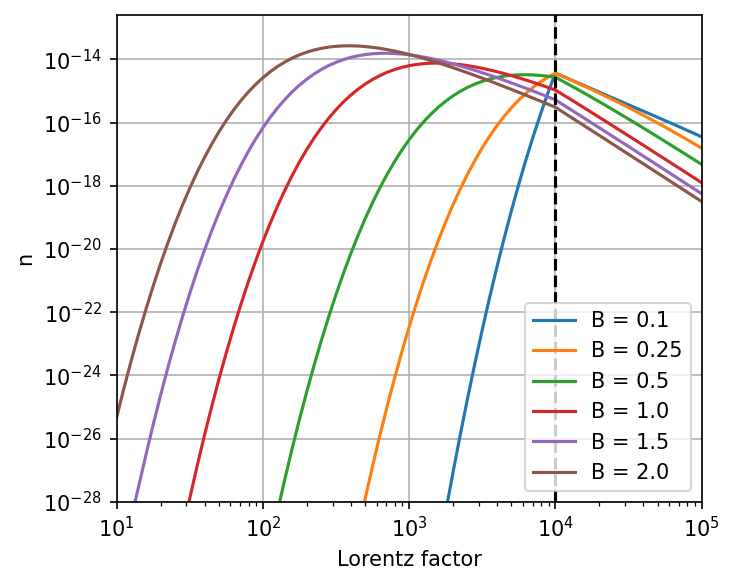

In [147]:
files = ["B 100.csv","B 250.csv","B 500.csv","B1000.csv","B1500.csv","B2000.csv"]
names = ["B = 0.1", "B = 0.25", "B = 0.5", "B = 1.0", "B = 1.5", "B = 2.0"]
plt.figure(figsize=[5,4])
for file, name in zip(files,names): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\{}".format(file),
    header=None,
    low_memory=False)
    sim_data=sim_data.T
    sim_data.columns = sim_data.iloc[0]
    sim_data = sim_data[1:]
    sim_data.reset_index(drop=True, inplace=True)
    plt.plot(sim_data["gamma"], sim_data.iloc[:,-1], label=name)
    print(name)
plt.ylabel("n")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Lorentz factor")
plt.xlim(1e1,1e5)
plt.ylim(1e-28,)
plt.vlines(1e4, 1e-28, 2e12, "black", "dashed")
plt.legend()
plt.tight_layout()
plt.grid()

In [168]:
def power_law(gamma, power, A):
    return A * gamma ** (power)

B = 0.1
B = 2.0


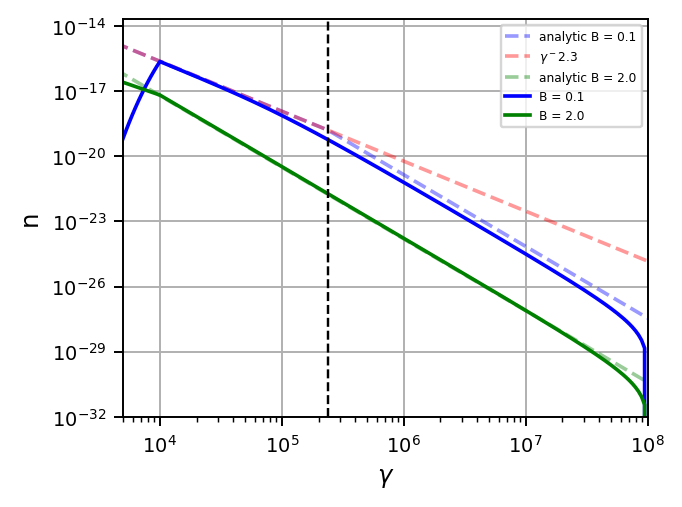

In [249]:
files = ["B 100.csv","B2000.csv"]
names = ["B = 0.1", "B = 2.0"]
colours = ["blue", "green"]
inject_p = 2.3
S=-1.29e-11
C=1.479802e-12
tau=2.501668e5
gamma_c = 1/(S * tau * (1 - inject_p))

fs=10

plt.figure(figsize=[4,3])
plt.plot(sim_data["gamma"][sim_data["gamma"] < gamma_c], 
         power_law(sim_data["gamma"][sim_data["gamma"] < gamma_c], -inject_p, C * tau), 
         c = colours[0],
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 0.1"
)
plt.plot(sim_data["gamma"][sim_data["gamma"] > gamma_c], 
         power_law(sim_data["gamma"][sim_data["gamma"] > gamma_c], -inject_p-1, C / (S*(1-inject_p))), 
         c= colours[0], 
         alpha=0.4, 
         ls="--",
)
plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -2.3, C * tau), 
         c= "red", 
         alpha=0.4, 
         ls="--",
         label=f"$\gamma^{-2.3}$"
)


S=-1.16e-08

plt.plot(sim_data["gamma"], 
         power_law(sim_data["gamma"], -inject_p-1, C / (S*(1-inject_p))), 
         c= colours[1], 
         alpha=0.4, 
         ls="--",
         label=f"analytic B = 2.0"
)

for file, name, colour in zip(files, names, colours): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\{}".format(file),
    header=None,
    low_memory=False)
    sim_data=sim_data.T
    sim_data.columns = sim_data.iloc[0]
    sim_data = sim_data[1:]
    sim_data.reset_index(drop=True, inplace=True)

    plt.plot(sim_data["gamma"], sim_data.iloc[:,-1], label=name, c=colour)
    print(name)
plt.ylabel("n", fontsize=fs)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$\gamma$", fontsize=fs)
plt.xticks(fontsize=fs*0.8)
plt.yticks(fontsize=fs*0.8)
plt.legend( loc="upper right",fontsize=fs*0.5)
plt.xlim(5e3, 1e8)
plt.ylim(1e-32, 2e-14)
plt.vlines(gamma_c, 1e-32, 2e12, "black", "dashed",lw=1)
plt.tight_layout()
plt.grid()

B = 0.1
B = 2.0


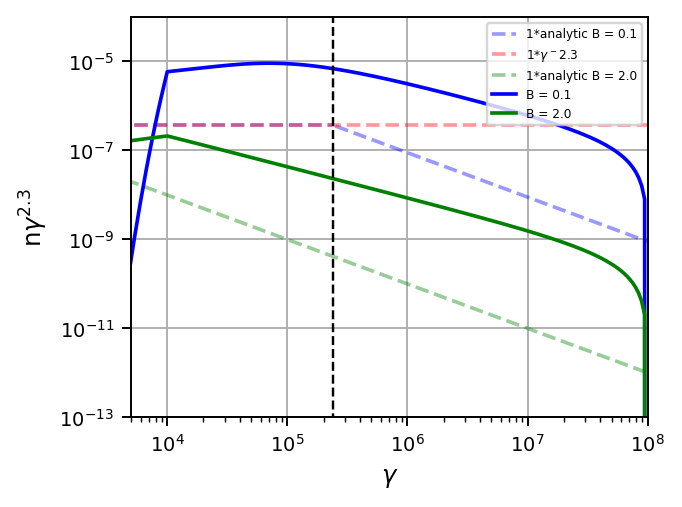

In [245]:
files = ["B 100.csv","B2000.csv"]
names = ["B = 0.1", "B = 2.0"]
colours = ["blue", "green"]
inject_p = 2.3
S=-1.29e-11
C=1.479802e-12
tau=2.501668e5
gamma_c = 1/(S * tau * (1 - inject_p))

fs=10
A=1
plt.figure(figsize=[4,3])
plt.plot(sim_data["gamma"][sim_data["gamma"] < gamma_c], 
         A*power_law(sim_data["gamma"][sim_data["gamma"] < gamma_c], -inject_p, C * tau) * sim_data["gamma"][sim_data["gamma"] < gamma_c]**2.3, 
         c = colours[0],
         alpha=0.4, 
         ls="--",
         label=f"{A}*analytic B = 0.1"
)
plt.plot(sim_data["gamma"][sim_data["gamma"] > gamma_c], 
         A*power_law(sim_data["gamma"][sim_data["gamma"] > gamma_c], -inject_p-1, C / (S*(1-inject_p))) * sim_data["gamma"][sim_data["gamma"] > gamma_c]**2.3, 
         c= colours[0], 
         alpha=0.4, 
         ls="--",
)
plt.plot(sim_data["gamma"], 
         A*power_law(sim_data["gamma"], -2.3, C * tau)* sim_data["gamma"]**2.3, 
         c= "red", 
         alpha=0.4, 
         ls="--",
         label=f"{A}*$\gamma^{-2.3}$"
)


S=-1.16e-08

plt.plot(sim_data["gamma"], 
         A*power_law(sim_data["gamma"], -inject_p-1, C / (S*(1-inject_p))) * sim_data["gamma"]**2.3, 
         c= colours[1], 
         alpha=0.4, 
         ls="--",
         label=f"{A}*analytic B = 2.0"
)

for file, name, colour in zip(files, names, colours): 
    sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\csv_data\{}".format(file),
    header=None,
    low_memory=False)
    sim_data=sim_data.T
    sim_data.columns = sim_data.iloc[0]
    sim_data = sim_data[1:]
    sim_data.reset_index(drop=True, inplace=True)

    plt.plot(sim_data["gamma"], sim_data.iloc[:,-1] * sim_data["gamma"]**2.3, label=name, c=colour)
    print(name)
plt.ylabel("n$\gamma^{2.3}$", fontsize=fs)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("$\gamma$", fontsize=fs)
plt.xticks(fontsize=fs*0.8)
plt.yticks(fontsize=fs*0.8)
plt.legend( loc="upper right",fontsize=fs*0.5)
plt.xlim(5e3, 1e8)
plt.ylim(1e-13, 1e-4)
plt.vlines(gamma_c, 1e-14, 1, "black", "dashed",lw=1)
plt.tight_layout()
plt.grid()

# NORMAL STEP

C:\Users\morga\AppData\Local\Temp\ipykernel_5200\209031365.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\simulation_data.csv",


Text(0.5, 0, 'Lorentz factor')

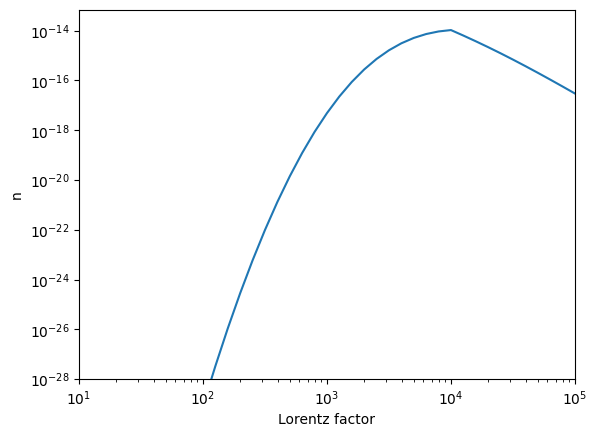

In [248]:
sim_data=pd.read_csv(r"C:\Users\morga\Masters Year\Modelling\Mphys_modelling\simulation_data.csv",
header=None)
sim_data=sim_data.T
sim_data.columns = sim_data.iloc[0]
sim_data = sim_data[1:]
sim_data.reset_index(drop=True, inplace=True)
plt.plot(sim_data["gamma"], sim_data.iloc[:,-1])
plt.ylabel("n")
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-28)
plt.xlim(1e1, 1e5)
plt.xlabel("Lorentz factor")